# Visualisations

In this notebook, we visualise the (simulated) photometry that corresponds to the physical galaxy parameters; both the original underlying parameters, as well as the (conditional) marginal likelihood estimates.

In [1]:
import os
import h5py
import torch as t
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import agnfinder.prospector

from agnfinder import config as cfg
from agnfinder.types import Filters
from agnfinder.prospector import Prospector
from agnfinder.prospector import visualise

In [2]:
try: # One-time setup
    assert(_SETUP)
except NameError:
    cfg.configure_logging()
    while not '.git' in os.listdir():
        os.chdir("../")
    dtype = t.float64
    device = t.device("cuda") if t.cuda.is_available() else t.device("cpu")
    if device == t.device("cuda"):
        print(f'Using GPU for training')
    else:
        print('CUDA is unavailable: training on CPU.')
        _SETUP = True

[INFO] 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

	AGNFinder
	Fri Sep 24 16:14:58 2021

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Using GPU for training


In [3]:
p = Prospector(filter_selection=Filters.Euclid, emulate_ssp=False, catalogue_loc="./data/cpz_paper_sample_week3.parquet")
print('initialised prospector')

[INFO] Using ./data/cpz_paper_sample_week3.parquet as catalog
[INFO] Adding maggies cols...
[INFO] Completed adding maggies cols.
[INFO] Building SedModel model
[INFO] Using fixed metallicity of 0.0
[INFO] Using free redshift
[INFO] Including dust emissions fixed parameters
[INFO] Using fixed IGM absorbtion (0.1 by default)
[INFO] Using free agn mass
[INFO] Using free agn_eb_v
[INFO] Using free obscured torus
[INFO] Using free inclination
[INFO] Building SPS model
[INFO] Building custom CSPSpecBasisAGN.
[INFO] Using standard FSPS for SSP, no emulation
[INFO] quasar template parameters: 

                  Configuration class `QuasarTemplateParams`
-------------------------------------------------------------------------------

interpolated_quasar_loc: './data/quasar_template_interpolated.dill'
interpolated_torus_loc: './data/normalised_torus_model.dill'
quasar_data_loc: './data/quasar_template_shang.txt'
recreate_quasar_template: False
recreate_torus_template: False
results_dir: 'resul

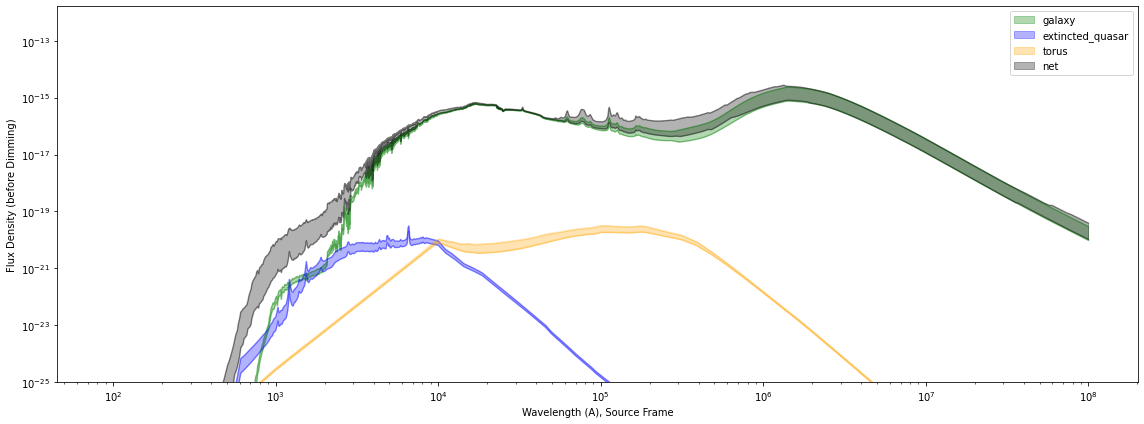

In [5]:
# fp = cfg.FreeParams()
# print(fp.raw_members)

samples_loc = "./data/cubes/photometry_simulation_100000n_z_0p0000_to_1p0000.hdf5"
with h5py.File(samples_loc, 'r') as f:
    samples = f['samples']
    theta_array = samples['theta'][-2000:, :]  # get the last 2000 (of 10,000)
    visualise.calculate_many_component(p, theta_array)
    plt.legend()
    plt.ylim([1e-25, None])
    plt.tight_layout()